#### 06 사이킷런으로 수행하는 타이타닉 생존자 예측

* Passengerid: 탑승자 데이터 일련번호
* Survived: 생존 여부, 0=사망, 1=생존
* pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex : 탑승자 성별
* name : 탑승자 이름
* Age : 탑승자 나이
* sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
* parch : 같이 탑승한 부모님 또는 어린이 인원수
* ticket : 티켓 번호
* fare : 요금
* cabin : 선실 번호
* embarked : 중간 정착 항구 C=Cherbourg, Q = Queenstown, S = Southampton

In [2]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp311-cp311-win_amd64.whl (1.9 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
     ---------------------------------------- 2.5/2.5 MB 22.8 MB/s eta 0:00:00
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
cd C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic

C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic


In [9]:
titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있다.\
RangeIndex가 891entries이므로 891개의 로우로 구성된다. 그리고 칼럼 수는 12개이다.\
2개의 칼럼이 float64 타입, 5개의 칼럼이 int64 타입, 5개의 칼럼이 object 타입이다.\
판다스의 object 타입은 string 타입으로 봐도 무방하다. 판다스는 넘파이 기반으로 만들어졌고 넘파이의 String 타입이 길이 제한이 있어서\
이에 대한 구분을 위해 object 타입으로 명기한 것이다. Age, Cabin, Embarked 칼럼은 각각 714개, 204개, 889개의 Not Null 값을 가지고 있으므로\
각각 177개, 608개, 2개의 Null값(NaN)을 가지고 있다.

사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 한다. 여기서는 DataFrame의 fillna() 함수를 사용해\
간단하게 Null 값을 평균 또는 고정 값으로 변경한다. Age의 경우는 평균 나이, 나머지 칼럼은 'N'값으로 변경한다. 그다음, 모든 칼럼의 Null 값이 없는지 다시 확인한다.

In [11]:
print(' Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Sex, Embarked 값은 별 문제가 없으나, Cabin(선실)의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않았다\
'C23, C25, C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin값이 4건이 된다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요.\
왜냐하면 이 시절에는 지금보다 부자와 가난한 사람에 대한 차별이 더 있었던 시절, 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것이다.\
Cabin 속성의 경우 앞 문자만 추출

In [12]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


성별에 따른 생존자 수 비교

In [14]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived 0은 사망, 1은 생존.\
탑승객은 남자가 577명,
여자가 314명으로 남자가 더 많다

NameError: name 'barplot' is not defined

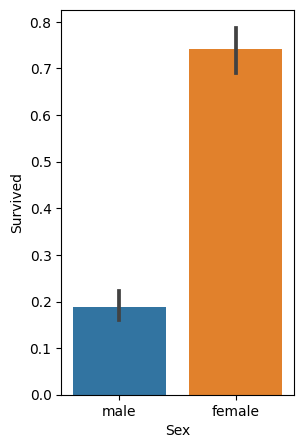

In [19]:
plt.figure(figsize=(3, 5))
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)
for bar in barplot.patches:
    bar.set_width(0.3)
plt.show()

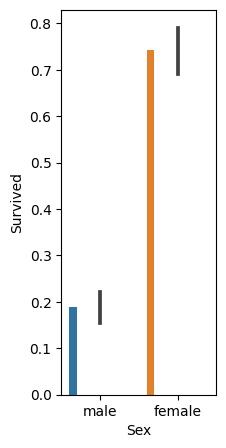

In [21]:
# 데이터를 그리기 전에 figure를 설정합니다.
plt.figure(figsize=(2, 5))

# seaborn의 barplot 함수를 이용해 그래프를 그립니다.
# 반환되는 객체를 barplot이라는 변수에 저장합니다.
barplot = sns.barplot(x='Sex', y='Survived', data=titanic_df)

# 각 막대에 대해, 막대의 너비를 조절합니다.
for bar in barplot.patches:
    bar.set_width(0.1)  # 이 값은 막대의 너비를 설정합니다. 이 값을 조절하여 원하는 너비로 설정하실 수 있습니다.

plt.show()  # 그래프를 화면에 표시합니다.


시각화 : 그래프의 시각적 만족도를 높이기 위해 그래프의 figsize를 조절하면서 막대그래프의 사이즈도 함께 조절하려고 했으나 barplot의 가운데 눈금과 맞지 않는 현상이 발생했다.\
GPT가 Seaborn은 그래프 막대의 가운데정렬이 안된다고 한다.

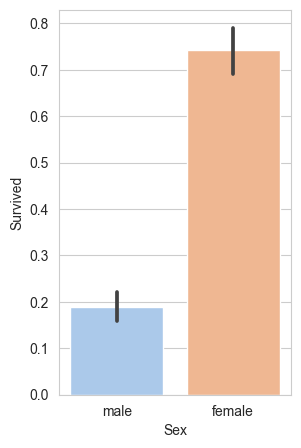

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(3, 5))
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)
plt.show()

#### 객실 등급 별 생존확률

<Axes: xlabel='Pclass', ylabel='Survived'>

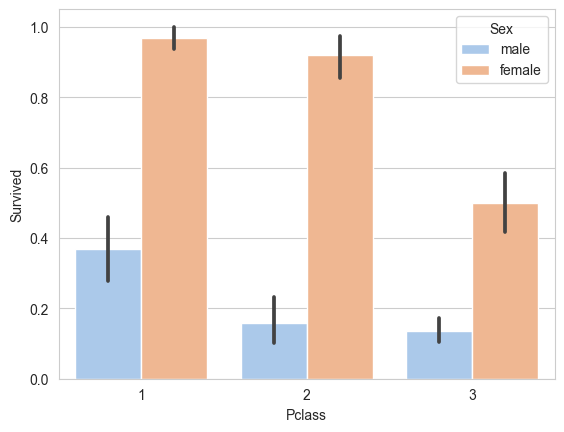

In [49]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

여성의 경우 1, 2등실에 따른 생존확률 차이는 크지 않으나, 3등실의 경우 생존 확률이 상대적으로 많이 떨어진다.\
남성의 경우는 일등실의 생존 확률이 2, 3등실의 생존 확률보다 월등히 높다.\

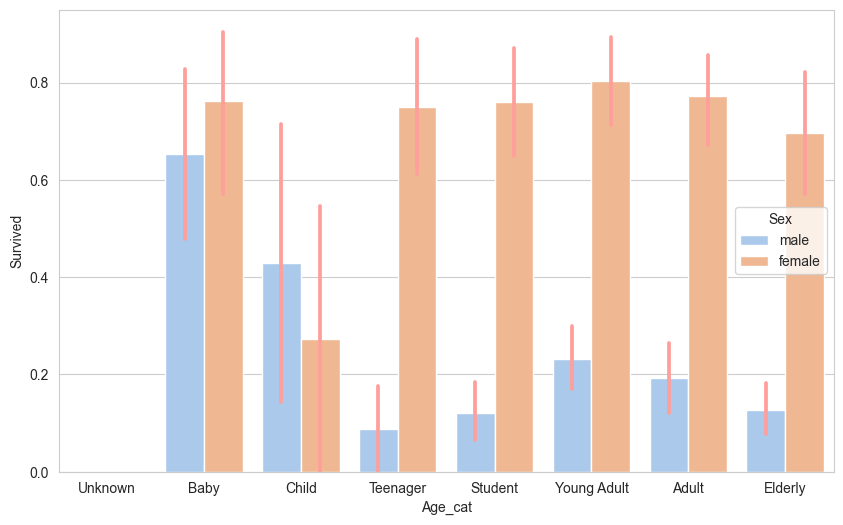

In [62]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure 수정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력 값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

pastel1 = sns.color_palette("pastel")[3]

sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names, errcolor=pastel1)
titanic_df.drop('Age_cat', axis = 1, inplace=True)

Seaborn의 barplot 함수에서 막대그래프 가운데 들어가 있는 선은 에러바로, 각 막대의 불확실성을 표시합니다.\
 이 선의 색상은 errcolor 매개변수를 사용해 변경할 수 있습니다.

 
 pastel1 = sns.color_palette("pastel")[3]

sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names, errcolor=pastel1)

LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수 -1)까지의 숫자 값으로 변환\
사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프로임워크 API인 fit(), transform()으로 데이터를 변환한다.\
여러 칼럼을 encode_features()함수를 새로 생성해 한번에 변환하도록 한다.

In [63]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature]) 
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


Sex, Cabin, Embarked 속성이 숫자형으로 바뀌었다.

In [75]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace=True)
    return df   

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

#레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [66]:
import os

In [67]:
os.getcwd()

'C:\\Users\\jongw\\OneDrive\\바탕 화면\\포트폴리오\\파이썬 머신러닝 완벽가이드\\06_titanic'

In [76]:
titanic_df = pd.read_csv(r'C:\Users\jongw\OneDrive\바탕 화면\포트폴리오\파이썬 머신러닝 완벽가이드\06_titanic\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

내려받은 학습 데이터 세트를 기반으로 해서 train_test_split() API를 이용해 별도의 테스트 데이터 세트를 추출.\
테스트 데이터 세트 크기는 전체의 20%로 한다.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해 타이타닉 생존자를 예측해 본다.\
LogisticRegression의 생성 인자로 입력된 solver = 'liblinear'는 로지스틱 회귀의 최적화 알고리즘을 libinear로 설정하는 것이다.\
일반적으로 작은 데이터 세트에서의 이진 분류는 liblinear가 성능이 약간 더 좋은 경향이 있다.


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회구를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있다.\
아직 최적화 작업을 수행하지 않았고, 데이터양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.\
다음으로는 교차 검증으로 결정 트리 모델을 좀 더 평가해 본다.\
앞에서 언급한 교차 검증을 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용한다\
먼저 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정한다.

In [81]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 에측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    #KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    #5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

In [83]:
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


cross_val_score()와 K 폴드 평균 정확도가 약간 다른데, 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.\
GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정.\
CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_sample_split, min_sample_leaf를 변경하면서 성능을 측정한다.\
최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로\
분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력

In [85]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


최적화된 하이퍼 파라미터인 max_depth = 3, min_samples_leaf = 5, min_samples_split = 2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상\
하이퍼 파라미터 변경 전보다 약 8%이상이 증가했는데, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기 매우 어렵다. 테스트용 데이터 세트가 작기 때문에\
수치상으로 예측 성능이 많이 증가한 것처럼 보인다